In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Final Project

## Greenhouse Gas Data

## Background Information


The four chemicals studied within this project all qualify as "greenhouse gases," demarcated as such because their presence in the atmosphere in a gaseous state aids in the trapping of solar radiation on the planet, thus keeping the planet within a metaphorical greenhouse, allowing the Earth to remain warm enough to sustain life as we know it.

The four chemicals studied are as follows:

CO2 - Carbon Dioxide. This is the most common greenhouse gas on this planet and an important part of the carbon cycle. As carbon-based lifeforms, we and practically all animals around us practice respiration, in which we breathe in oxygen to create CO2 and water. Overly high concentrations of CO2 within the atmosphere can lead to acidic rainfall and drastic temperature increases, causing great strain on both land-based and oceanic life.

CH4 - Methane. This is the second most common greenhouse gas on the planet and an important part of the planet's methane cycle. Methane is 20x more effective at trapping heat than CO2, and is explosive in large concentrations within an enclosed space.

N2O - Nitrous Oxide. A part of the planet's nitrogen cycle and the third most common greenhouse gas within this list. The gas is approx. 310x more effective at trapping heat than CO2, and is commercially utilized as laughing gas and a freezing agent for foods.

SF6 - Sulfur Hexaflouride. The gas is synthetically produced as insulation for electrical components. The gas is approx. 2400x the global warming potential of CO2.

### Plot the yearly trends for each chemical, and make sure to plot the uncertainties as well. What if any are the patterns?


In [2]:
# Read in the data, both annual and monthly
co2_annual = np.genfromtxt('co2_annmean_gl.txt')
co2_monthly = np.genfromtxt('co2_mm_gl.txt')
ch4_annual = np.genfromtxt('ch4_annmean_gl.txt')
ch4_monthly = np.genfromtxt('ch4_mm_gl.txt')
n2o_annual = np.genfromtxt('n2o_annmean_gl.txt')
n2o_monthly = np.genfromtxt('n2o_mm_gl.txt')
sf6_annual = np.genfromtxt('sf6_annmean_gl.txt')
sf6_monthly = np.genfromtxt('sf6_mm_gl.txt')

# Big Slice Boi. It is decided to universally begin data at 2001 in order to have a stable starting line.
# That way, each chemical is more directly comparable with each other.
co2_annual_date = co2_annual[21:,0]
co2_annual_conc = co2_annual[21:,1]
co2_annual_unc = co2_annual[21:,2]
# Data from post-early 2019 has been cut to maintain presentation, as the annual averages do not extend there quite yet.
co2_monthly_date = co2_monthly[252:469,2]
co2_monthly_conc = co2_monthly[252:469,3]
# CO2 monthly uncertainty appears to be a universal 0.13 ppm, as according to commentary on the data

ch4_annual_date = ch4_annual[17:,0]
ch4_annual_conc = ch4_annual[17:,1]
ch4_annual_unc = ch4_annual[17:,2]

ch4_monthly_date = ch4_monthly[210:427,2]
ch4_monthly_conc = ch4_monthly[210:427,3]
ch4_monthly_unc = ch4_monthly[210:427,4]

n2o_annual_date = n2o_annual[0:,0]
n2o_annual_conc = n2o_annual[0:,1]
n2o_annual_unc = n2o_annual[0:,2]

n2o_monthly_date = n2o_monthly[0:217,2]
n2o_monthly_conc = n2o_monthly[0:217,3]
n2o_monthly_unc = n2o_monthly[0:217,4]

sf6_annual_date = sf6_annual[3:,0]
sf6_annual_conc = sf6_annual[3:,1]
sf6_annual_unc = sf6_annual[3:,2]

sf6_monthly_date = sf6_monthly[42:259,2]
sf6_monthly_conc = sf6_monthly[42:259,3]
sf6_monthly_unc = sf6_monthly[42:259,4]


# To deal with different types of measurement (CO2 is in PPM, CH4&N2O are in PPB, SF6 is in PPT), we are uniting all measurements to PPB for convenience.
# PPM to PPB is 1:1,000. Therefore, CO2 data is multiplied by 1000.
co2_annual_conc = co2_annual_conc * 1000
co2_monthly_conc = co2_monthly_conc * 1000
# PPB to PPT is 1:1,000,000. Therefore, SF6 data is divided by 1,000,000
sf6_annual_conc = sf6_annual_conc / 1000000
sf6_annual_unc = sf6_annual_unc / 1000000
sf6_monthly_conc = sf6_monthly_conc / 1000000
sf6_monthly_unc = sf6_monthly_unc / 1000000

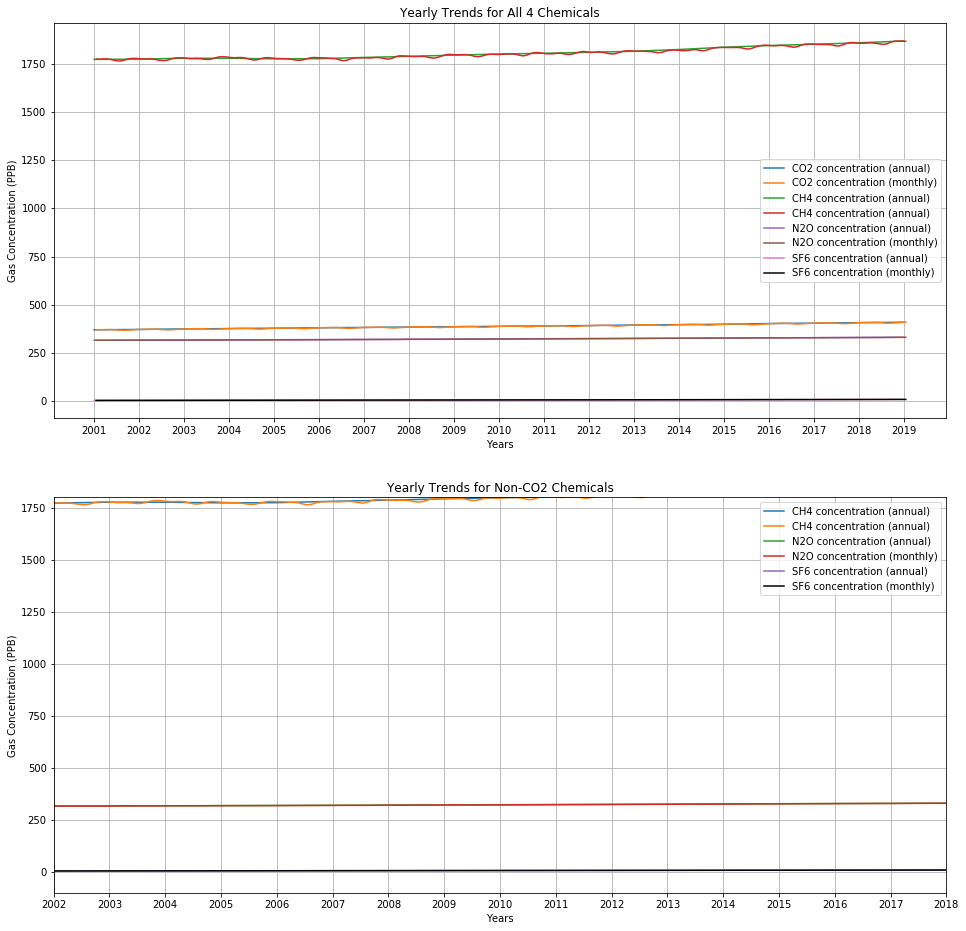

In [19]:
# Plotting
# The point of this initial graph is to simply compare each chemical to each other.
plt.figure(figsize = (16,16))

plt.subplot(2,1,1)
# The first subplot is one that includes CO2. Due to the abnormally high concentration of CO2 in comparison to the other chemicals, a second subplot will be included to show the other 3 in direct comparison.
plt.plot(co2_annual_date,co2_annual_conc,label='CO2 concentration (annual)')
plt.plot(co2_monthly_date,co2_monthly_conc,label='CO2 concentration (monthly)')
plt.plot(ch4_annual_date,ch4_annual_conc,label='CH4 concentration (annual)')
plt.plot(ch4_monthly_date,ch4_monthly_conc,label='CH4 concentration (annual)')
plt.plot(n2o_annual_date,n2o_annual_conc,label='N2O concentration (annual)')
plt.plot(n2o_monthly_date,n2o_monthly_conc,label='N2O concentration (monthly)')
plt.plot(sf6_annual_date,sf6_annual_conc,label='SF6 concentration (annual)')
plt.plot(sf6_monthly_date,sf6_monthly_conc,c='#000000',label='SF6 concentration (monthly)')
# xticks command allows us to add in dates via a range        
plt.xticks(np.arange(min(sf6_annual_date),max(sf6_annual_date)+1, 1))
#SF6 annual date chosen out of convenience. All data measures from 2001 to 2019, so each one is practically the same. 
plt.title('Yearly Trends for All 4 Chemicals')
plt.legend()
plt.grid()
plt.ylabel('Gas Concentration (PPB)')
plt.xlabel('Years')

plt.subplot(2,1,2)
#aforementioned 2nd subplot, serves mainly to establish the expected order more clearly: CO2>CH4>N2O>SF6
plt.plot(ch4_annual_date,ch4_annual_conc,label='CH4 concentration (annual)')
plt.plot(ch4_monthly_date,ch4_monthly_conc,label='CH4 concentration (annual)')
plt.plot(n2o_annual_date,n2o_annual_conc,label='N2O concentration (annual)')
plt.plot(n2o_monthly_date,n2o_monthly_conc,label='N2O concentration (monthly)')
plt.plot(sf6_annual_date,sf6_annual_conc,label='SF6 concentration (annual)')
plt.plot(sf6_monthly_date,sf6_monthly_conc,c='#000000',label='SF6 concentration (monthly)')  
plt.xticks(np.arange(min(sf6_annual_date),max(sf6_annual_date)+1, 1))
plt.title('Yearly Trends for Non-CO2 Chemicals')
plt.legend()
plt.grid()
plt.ylabel('Gas Concentration (PPB)')
plt.xlabel('Years')
# A zoom in is included for more readability. 
plt.axis([2002,2018,-100,1800])
plt.show()

# The graph essentially proves the initial background knowledge accurate.
# CO2 is the most commonplace of the chemicals, followed by CH4, N2O, and SF6. 

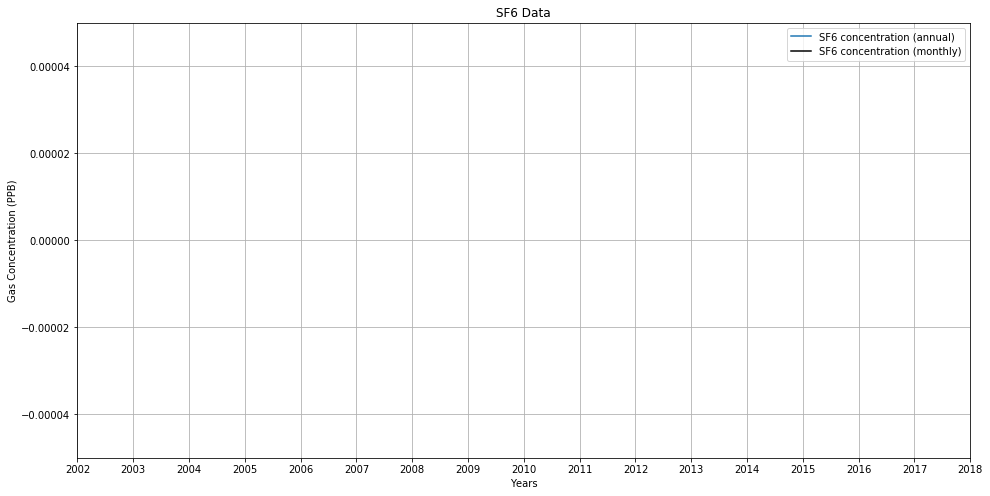

In [20]:
# A final additional graph is included to denote the incredibly low values found for SF6
plt.figure(figsize = (16,8))
plt.plot(sf6_annual_date,sf6_annual_conc,label='SF6 concentration (annual)')
plt.plot(sf6_monthly_date,sf6_monthly_conc,c='#000000',label='SF6 concentration (monthly)')     
plt.xticks(np.arange(min(sf6_annual_date),max(sf6_annual_date)+1, 1))
# Zoom in
plt.axis([2002,2018,-0.00005,.00005])
plt.title('SF6 Data')
plt.legend()
plt.grid()
plt.ylabel('Gas Concentration (PPB)')
plt.xlabel('Years')
plt.show()

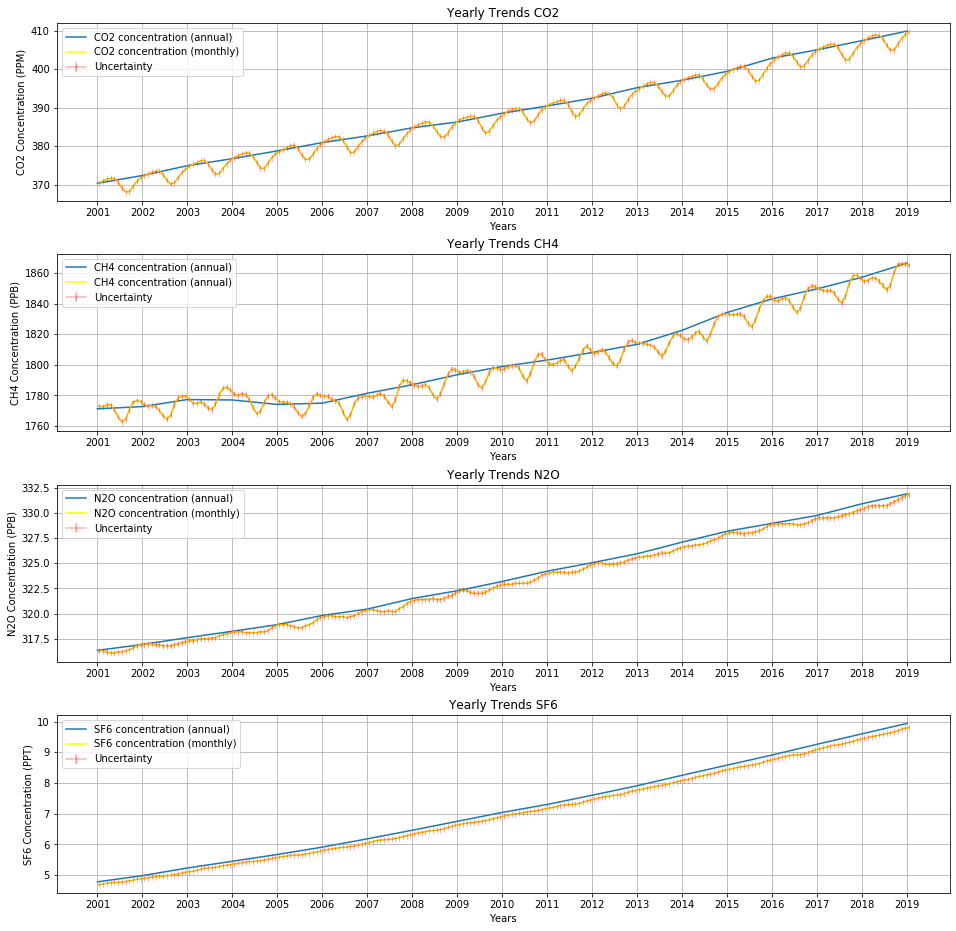

In [7]:
# To display each chemical individually, we're reverting the units back to their natively measured units. Thus, CO2 will be in PPM, and SF6 will be in PPT.
# This method of display guarantees the best visually presentable y-values for our graph.
# Mildly sloppy coding in reusing the same variables, but since Python operates on a single line, we can cut corners where we can.
co2_annual_conc = co2_annual_conc / 1000
co2_monthly_conc = co2_monthly_conc / 1000
sf6_annual_conc = sf6_annual_conc * 1000000
sf6_annual_unc = sf6_annual_unc * 1000000
sf6_monthly_conc = sf6_monthly_conc * 1000000
sf6_monthly_unc = sf6_monthly_unc * 1000000

# Individual plotting per chemical + uncertainty
# Utilizing both the monthly data and the annual data allows us to visualize patterns. 
# While the monthly data serves as raw representations of concentration, the annual data provides a streamlined look at a pattern of increasing concentration through the years.
plt.figure(figsize = (16,16))

plt.subplot(4,1,1)
plt.plot(co2_annual_date,co2_annual_conc,label='CO2 concentration (annual)')
#plt.errorbar(co2_annual_date,co2_annual_conc, yerr = (co2_annual_unc),alpha=0.5,marker='.',label='Uncertainty')
#Annual uncertainty redacted to maintain form of graph and due to its overall miniscule nature.
plt.plot(co2_monthly_date,co2_monthly_conc,c='#fcfc03',label='CO2 concentration (monthly)')
plt.errorbar(co2_monthly_date,co2_monthly_conc, yerr = 0.13,alpha=0.3,marker='|',c='#fc0303',label='Uncertainty')
plt.ylabel('CO2 Concentration (PPM)')
plt.xlabel('Years')
plt.xticks(np.arange(min(co2_annual_date),max(co2_annual_date)+1, 1))
plt.title('Yearly Trends CO2')
plt.legend()
plt.grid()
#plt.ylim([370,371])
#plt.xlim([2001,2002])

plt.subplot(4,1,2)
plt.plot(ch4_annual_date,ch4_annual_conc,label='CH4 concentration (annual)')
plt.plot(ch4_monthly_date,ch4_monthly_conc,c='#fcfc03',label='CH4 concentration (annual)')
plt.errorbar(ch4_monthly_date,ch4_monthly_conc, yerr = ch4_monthly_unc,alpha=0.3,marker='|',c='#fc0303',label='Uncertainty')
plt.ylabel('CH4 Concentration (PPB)')
plt.xlabel('Years')
plt.xticks(np.arange(min(ch4_annual_date),max(ch4_annual_date)+1, 1))
plt.title('Yearly Trends CH4')
plt.legend()
plt.grid()
         
plt.subplot(4,1,3)
plt.plot(n2o_annual_date,n2o_annual_conc,label='N2O concentration (annual)')
plt.plot(n2o_monthly_date,n2o_monthly_conc,c='#fcfc03',label='N2O concentration (monthly)')
plt.errorbar(n2o_monthly_date,n2o_monthly_conc, yerr = n2o_monthly_unc,alpha=0.3,marker='|',c='#fc0303',label='Uncertainty')
plt.ylabel('N2O Concentration (PPB)')
plt.xlabel('Years')
plt.xticks(np.arange(min(n2o_annual_date),max(n2o_annual_date)+1, 1))
plt.title('Yearly Trends N2O')
plt.legend()
plt.grid()

plt.subplot(4,1,4)
plt.plot(sf6_annual_date,sf6_annual_conc,label='SF6 concentration (annual)')
plt.plot(sf6_monthly_date,sf6_monthly_conc,c='#fcfc03',label='SF6 concentration (monthly)')
plt.errorbar(sf6_monthly_date,sf6_monthly_conc, yerr = sf6_monthly_unc,alpha=0.3,marker='|',c='#fc0303',label='Uncertainty')
plt.ylabel('SF6 Concentration (PPT)')
plt.xlabel('Years')
plt.xticks(np.arange(min(sf6_annual_date),max(sf6_annual_date)+1, 1))
plt.title('Yearly Trends SF6')
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.3)

plt.show()

Parts per Million (10*-6)   Parts per billion (10*-9)   Parts per Trillion (10*-12) 

ex) 400 ppm(co2) = 400 molecules of co2 divided by sample of 

### Is it possible to statistically establish that the rate of increase is changing for each of these chemicals? Why or why not?

In [8]:
# First step is to try and make the straight lines for each chemical to graphically demonstrate a change in the ROC
# Thus, finding some slopes is necessary.
# First, define a pseudo set of years. Since the data calculations start at 2001, 2001 is designated 0.
# This can also be done by just subtracting sf6_annual_date by 2001. The reason we're not is spaghetti.

years = np.arange(0,19)

# I'm gonna put some numbers in your eye

sum_years = years.sum()
sum_years_real = sf6_annual_date.sum()

sum_co2 = co2_annual_conc.sum()
sum_ch4 = ch4_annual_conc.sum()
sum_n2o = n2o_annual_conc.sum()
sum_sf6 = sf6_annual_conc.sum()

mean_co2 = (co2_annual_conc[0]+co2_annual_conc[1]) / 2
mean_ch4 = (ch4_annual_conc[0]+ch4_annual_conc[1]) / 2
mean_n2o = (n2o_annual_conc[0]+n2o_annual_conc[1]) / 2
mean_sf6 = (sf6_annual_conc[0]+sf6_annual_conc[1]) / 2

mean_years = sum_years / len(years)
mean_years_real = sum_years_real / len(sf6_annual_date)

# Slope Time

#numerator = np.sum((x-mean_x)*(y-mean_y))
#denominator = np.sum((x-mean_x)**2)
#slope = numerator / denominator
co2_slope = slope = (years[1] - years[0]) / (co2_annual_conc[1] - co2_annual_conc[0])
ch4_slope = (years[1] - years[0]) / (ch4_annual_conc[1] - co2_annual_conc[0])
n2o_slope = (years[1] - years[0]) / (n2o_annual_conc[1] - co2_annual_conc[0])
sf6_slope = (years[1] - years[0]) / (sf6_annual_conc[1] - co2_annual_conc[0])

# Those Y-intercepts are late. I'm not paying for those.
# Intercept = mean_y - slope*mean_x

co2_intercept = mean_co2 - co2_slope*np.mean(years[0:2])
ch4_intercept = mean_ch4 - ch4_slope*np.mean(years[0:2])
n2o_intercept = mean_n2o - n2o_slope*np.mean(years[0:2])
sf6_intercept = mean_sf6 - sf6_slope*np.mean(years[0:2])

# Straight Line's 10 hour guarantee is a promise man. I know to you, Peter, a promise means nothing.
# y_straight_line = slope*time_in_years + yintercept
co2_straight_line = co2_slope*years + co2_intercept 
ch4_straight_line = ch4_slope*years + ch4_intercept 
n2o_straight_line = n2o_slope*years + n2o_intercept
sf6_straight_line = sf6_slope*years + sf6_intercept

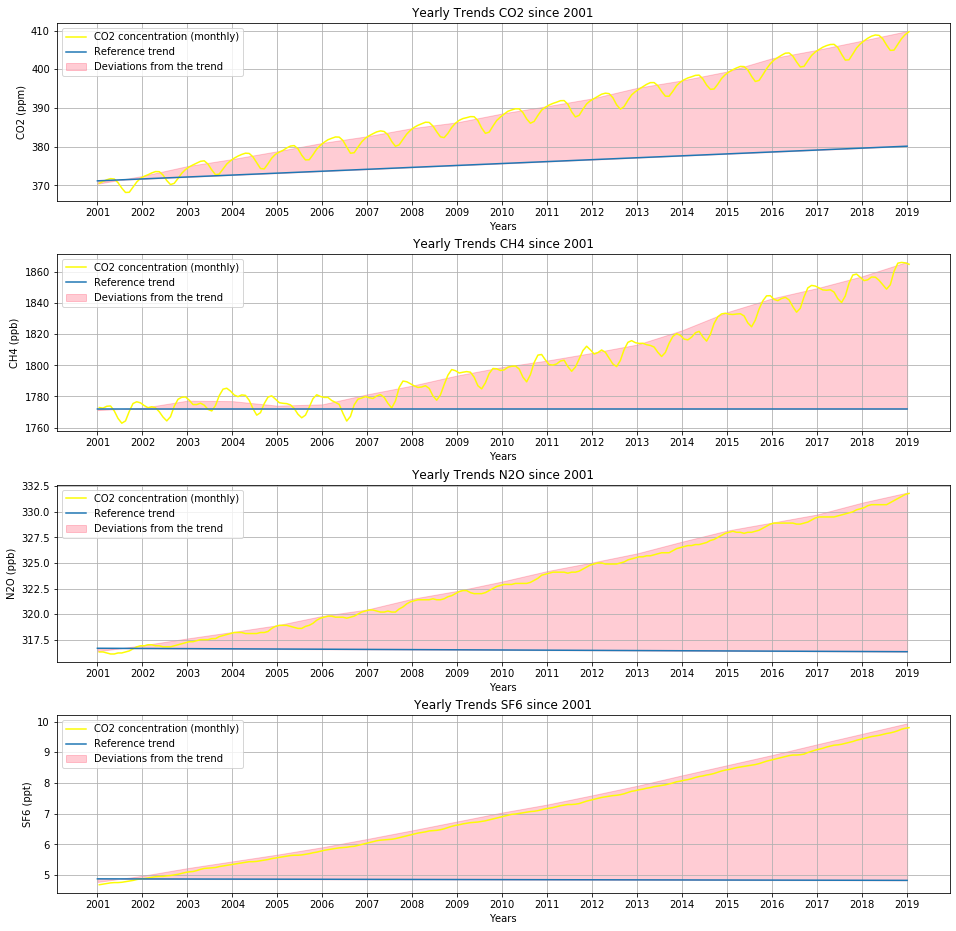

In [15]:
# GOOOOooooOOOOOooooOOOOO plotting.
# Just as in the previous graph, the monthly data is mostly for show, adding visual flare. The important parts are the comparisons between annual data and the straight lines set up.
plt.figure(figsize = (16,16))

plt.subplot(4,1,1)
plt.plot(co2_monthly_date,co2_monthly_conc,c='#fcfc03',label='CO2 concentration (monthly)')
plt.plot(co2_annual_date,co2_straight_line,label='Reference trend')
plt.fill_between(co2_annual_date,co2_straight_line,co2_annual_conc,color='#FF002B',alpha=0.2,label='Deviations from the trend')
plt.xticks(np.arange(min(co2_annual_date),max(co2_annual_date)+1, 1))
plt.legend()
plt.grid()
plt.title('Yearly Trends CO2 since 2001')
plt.ylabel('CO2 (ppm)')
plt.xlabel('Years')

plt.subplot(4,1,2)
plt.plot(ch4_monthly_date,ch4_monthly_conc,c='#fcfc03',label='CO2 concentration (monthly)')
plt.plot(ch4_annual_date,ch4_straight_line,label='Reference trend')
plt.fill_between(ch4_annual_date,ch4_straight_line,ch4_annual_conc,color='#FF002B',alpha=0.2,label='Deviations from the trend')
plt.xticks(np.arange(min(ch4_annual_date),max(ch4_annual_date)+1, 1))
plt.legend()
plt.grid()
plt.title('Yearly Trends CH4 since 2001')
plt.ylabel('CH4 (ppb)')
plt.xlabel('Years')

plt.subplot(4,1,3)
plt.plot(n2o_monthly_date,n2o_monthly_conc,c='#fcfc03',label='CO2 concentration (monthly)')
plt.plot(n2o_annual_date,n2o_straight_line,label='Reference trend')
plt.fill_between(n2o_annual_date,n2o_straight_line,n2o_annual_conc,color='#FF002B',alpha=0.2,label='Deviations from the trend')
plt.xticks(np.arange(min(n2o_annual_date),max(n2o_annual_date)+1, 1))
plt.legend()
plt.grid()
plt.title('Yearly Trends N2O since 2001')
plt.ylabel('N2O (ppb)')
plt.xlabel('Years')

plt.subplot(4,1,4)
plt.plot(sf6_monthly_date,sf6_monthly_conc,c='#fcfc03',label='CO2 concentration (monthly)')
plt.plot(sf6_annual_date,sf6_straight_line,label='Reference trend')
plt.fill_between(sf6_annual_date,sf6_straight_line,sf6_annual_conc,color='#FF002B',alpha=0.2,label='Deviations from the trend')
plt.xticks(np.arange(min(sf6_annual_date),max(sf6_annual_date)+1, 1))
plt.legend()
plt.grid()
plt.title('Yearly Trends SF6 since 2001')
plt.ylabel('SF6 (ppt)')
plt.xlabel('Years')

plt.subplots_adjust(hspace=0.3)
plt.show()

# By visualzing these changes, we are, in a roundabout way, determining that statistically establishing a change in the ROC is possible. If something is visually identifiable, it is therefore statistically possible as well, with some extra work. 

### Plot the chemistry and temperature data together in overlapping periods. Is there a meaningful correlation?

In [17]:
# Read in the data, both annual and monthly
# Utilizing NOAA MLO Annual data, as NASA utilizes the monthly data from the same source, so the two are correlated.
# Through utilization of NOAA's annual data, we can entirely bypass the tenuous effort of matching monthly data to temperature, which is measured annually.
co2_annual_mlo = np.genfromtxt('co2_annmean_mlo.txt')
temp = np.genfromtxt('nasa_temp.txt')
# Big Slice Boi. It is decided to universally begin data at 1959 for temp to match CO2
co2_mlo_date = co2_annual_mlo[:,0]
co2_mlo_conc = co2_annual_mlo[:,1]

temp_lowess = temp[79:,2]

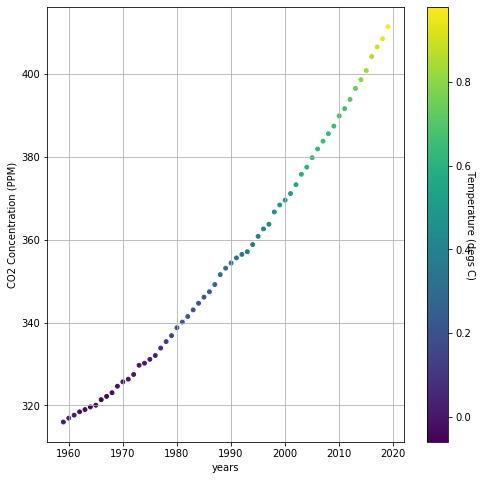

In [18]:
# Plotting out
# Color is used to represent temperature.
plt.figure(figsize = (8,8))
plt.scatter(co2_mlo_date,co2_mlo_conc,s=15,c=temp_lowess,label='SST',cmap='viridis')
plt.grid()
cbar = plt.colorbar()
cbar.ax.set_ylabel('Temperature (degs C)', rotation=270)
plt.xlabel('years')
plt.ylabel('CO2 Concentration (PPM)')
plt.show()

### What are the proposed strategies to dealing with these atmospheric chemistry impacts? What are the relatives pros and cons?

According to the EPA, a variety of strategies are being employed to counteract the effects of these gases on the atmosphere, generally through the reduction of their spread. Some strategies are listed below, divided based on chemical.
CO2
・Increasing energy effiency, thus reducing energy consumption, through compliance with the ENERGY STAR program and the monitoring of fuel use.
・Switching fuel sources to become less reliant on carbon-based fuels in general, such as switching from gasoline to electric-powered vehicles.
・Carbon Capture and Sequestration (CCS) - capturing and controlling CO2 spread as it is being produced at factories and other facilities.
CH4
・Equipment improvements to reduce methane leaks and the capture of methane from naturaly occurring sources, such as coal mines, serve to reduce its presence.
・Agricultural changes by changing animal feeding methods, lowering methane production from organic sources.
・CH4 capture from landfills and other locations of waste accumulation.
N2O
・Reduction of nitrogen-based fertilizer use, or switching away from nitrogen-based fertilizers entirely.
・Reduction of fuel consumption in vehicles burning fuels would also reduce N2O production.
SF6
・Gas substitution for the same utilities.
・Adoption of recycling and destruction processes for flourinated gases in general (including SF6).
・Upgrading of equipment to prevent spills and leakages of the chemical into the environment.
All of these strategies serve to effectively reduce the presence of these gases in the atmosphere. However, as a considerable drawback, each and every one of these strategies inherent involve the upsetting of the status quo. In layman's terms, it requires the utilization of large sums of money in order to drive the system towards the more charitable and desired outcome. This singular, major con of each and every strategy serves to ensure that the outcome remains unattainable, and our emissions have continued rising despite these efforts. In principle, the strategies offer massive pros. Their effectiveness in dealing with the atmospheric impact is logically sound and generally speaking, tested and effective. However, like many good ideas, these strategies are ineffective in execution, leading us to our current predicament of rising concentrations for these chemicals and a corresponding rise in temperature. While discussing what the future may hold should the trend continue is beyond the scope of this project, it is safe to say that the project completes its task in visually demonstrating our current predicament and the string of steps we have essentially taken to reach this current status.